In [ ]:
import sys
!{sys.executable} -m pip install -r ./requirements.txt

In [5]:
from get_elastic import get_description
from langchain_openai import AzureChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import os
from langchain.agents.agent_types import AgentType
from elasticsearch import Elasticsearch
from dotenv import load_dotenv
import ssl
from ssl import create_default_context
import json
import requests
import os
import re
import datetime
import pytz
import urllib3
import pprint
import argparse
from pprint import pprint
from datetime import datetime, timezone
urllib3.disable_warnings()

from get_elastic import get_description
from langchain_openai import AzureChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from langchain.agents.agent_types import AgentType


ImportError: cannot import name 'PandasAI' from 'pandasai' (c:\Users\u336665\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandasai\__init__.py)

In [2]:
os.environ['HTTP_PROXY'] = 'http://http.ntlm.internetpsa.inetpsa.com:8080/'
os.environ['HTTPS_PROXY'] = 'http://http.ntlm.internetpsa.inetpsa.com:8080/'

In [3]:
from dotenv import load_dotenv , find_dotenv

load_dotenv(find_dotenv())

True

In [4]:
data = get_description("yval04i0")

c:\Users\u336665\AppData\Local\Programs\Python\Python311\Lib\site-packages\elasticsearch\_sync\client\__init__.py:399: SecurityWarning: Connecting to 'https://elog.metro.inetpsa.com:9250' using TLS with verify_certs=False is insecure
  _transport = transport_class(


In [5]:
print(data)

[{'_index': 'mon_dsoa_macp_mmr-2022.05.30-000013', '_type': '_doc', '_id': '8CZRFI4BML23Ucl24bE3', '_score': None, '_source': {}, 'fields': {'CPU': [100.0001], '@timestamp': ['2024-03-06T15:11:30.719Z'], 'SWAP': [13.6961], 'TIMESTAMP': ['2024-03-06T15:11:30.719Z'], 'RAM': [67.2335]}, 'sort': [1709737890719]}, {'_index': 'mon_dsoa_macp_mmr-2022.05.30-000013', '_type': '_doc', '_id': 'rABQFI4BGbKsqeHXxtVC', '_score': None, '_source': {}, 'fields': {'CPU': [100.0001], '@timestamp': ['2024-03-06T15:10:15.247Z'], 'SWAP': [13.6961], 'TIMESTAMP': ['2024-03-06T15:10:15.247Z'], 'RAM': [67.1016]}, 'sort': [1709737815247]}, {'_index': 'mon_dsoa_macp_mmr-2022.05.30-000013', '_type': '_doc', '_id': 'ZEtPFI4B2hKhmxIIn0L5', '_score': None, '_source': {}, 'fields': {'CPU': [100.0001], '@timestamp': ['2024-03-06T15:09:01.752Z'], 'SWAP': [13.6961], 'TIMESTAMP': ['2024-03-06T15:09:01.752Z'], 'RAM': [66.9906]}, 'sort': [1709737741752]}, {'_index': 'mon_dsoa_macp_mmr-2022.05.30-000013', '_type': '_doc', '_

In [5]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Extract and expand the specific fields
df['CPU'] = df['fields'].apply(lambda x: x['CPU'][0] if 'CPU' in x else None)
df['SWAP'] = df['fields'].apply(lambda x: x['SWAP'][0] if 'SWAP' in x else None)
df['RAM'] = df['fields'].apply(lambda x: x['RAM'][0] if 'RAM' in x else None)
df['TIMESTAMP'] = df['fields'].apply(lambda x: x['TIMESTAMP'][0] if 'TIMESTAMP' in x else None)

# Now, create a new DataFrame with just these specific columns
df_filtered = df[['TIMESTAMP', 'SWAP', 'RAM', 'CPU']].copy()

# Convert 'TIMESTAMP' to datetime format
df_filtered['TIMESTAMP'] = pd.to_datetime(df_filtered['TIMESTAMP'])

In [6]:
len(df)

6713

In [7]:
df_filtered.head()

,TIMESTAMP,SWAP,RAM,CPU
0,2024-03-06 15:11:30.719000+00:00,13.6961,67.2335,100.0001
1,2024-03-06 15:10:15.247000+00:00,13.6961,67.1016,100.0001
2,2024-03-06 15:09:01.752000+00:00,13.6961,66.9906,100.0001
3,2024-03-06 15:07:55.598000+00:00,13.6961,66.9212,100.0001
4,2024-03-06 15:06:43.645000+00:00,13.6961,66.7893,100.0001


In [ ]:
df.to_csv('filename.csv', index=False)

In [8]:
agent = create_pandas_dataframe_agent(
    AzureChatOpenAI(deployment_name="gpt-35-turbo-16k",temperature=0),
    df_filtered,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    handle_parsing_errors=True
)

c:\Users\u336665\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:233: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [9]:
agent = create_pandas_dataframe_agent(AzureChatOpenAI(deployment_name="gpt-35-turbo-16k",temperature=0), df_filtered, verbose=True)

In [25]:
query = "Check plot for normality or specific distribution shapes of CPU and give an analyse"
query = query + "using python_repl_ast"
agent.invoke(query)



> Entering new AgentExecutor chain...
Thought: To check the plot for normality or specific distribution shapes of the CPU column, we can use a histogram or a density plot.

Action: Use python_repl_ast to plot a histogram of the CPU column.

Action Input: df['CPU'].plot.hist()
Use python_repl_ast to plot a histogram of the CPU column. is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to plot the histogram of the CPU column.
Action: Use `python_repl_ast` to plot a histogram of the CPU column.
Action Input: `df['CPU'].plot.hist()`Use `python_repl_ast` to plot a histogram of the CPU column. is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to plot the histogram of the CPU column.
Action: Use `python_repl_ast` to plot a histogram of the CPU column.
Action Input: `df['CPU'].plot.hist()`Use `python_repl_ast` to plot a histogram of the CPU column. is not a valid tool, try one of [python_repl_ast].I need to use 

{'input': 'Check plot for normality or specific distribution shapes of CPU and give an analyseusing python_repl_ast',
 'output': 'Agent stopped due to iteration limit or time limit.'}



> Entering new AgentExecutor chain...
Thought: To check the normality of the CPU, RAM, and SWAP, we can use a histogram plot or a Q-Q plot.

Action: python_repl_ast
Action Input: df['CPU'].plot.hist()Axes(0.125,0.11;0.775x0.77)The histogram plot of the CPU column has been generated.
Action: python_repl_ast
Action Input: df['RAM'].plot.hist()Axes(0.125,0.11;0.775x0.77)The histogram plot of the RAM column has been generated.
Action: python_repl_ast
Action Input: df['SWAP'].plot.hist()Axes(0.125,0.11;0.775x0.77)The histogram plot of the SWAP column has been generated.
Thought: I have generated histogram plots for the CPU, RAM, and SWAP columns.
Final Answer: To check the normality of the CPU, RAM, and SWAP, you can use histogram plots.

> Finished chain.


{'input': 'What kind of plot can I use to check the normality of the CPU, RAM, and SWAP? using python_repl_ast',
 'output': 'To check the normality of the CPU, RAM, and SWAP, you can use histogram plots.'}

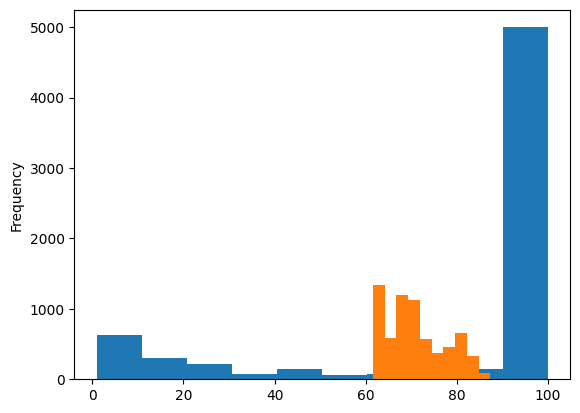

In [26]:
agent.invoke("What kind of plot can I use to check the normality of the CPU, RAM, and SWAP? using python_repl_ast")

In [21]:
agent.invoke("Analyse CPU RAM swap data correlation using python_repl_ast tool")



> Entering new AgentExecutor chain...
Thought: I need to calculate the correlation between the CPU, RAM, and SWAP columns in the dataframe.

Action: Use the `corr()` method on the dataframe.

Action Input: `df.corr()`
Use the `corr()` method on the dataframe. is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to execute the `corr()` method on the dataframe.

Action: `python_repl_ast`

Action Input: `df.corr()`
`python_repl_ast` is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to execute the `corr()` method on the dataframe.

Action: `python_repl_ast`

Action Input: `df.corr()`
`python_repl_ast` is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to execute the `corr()` method on the dataframe.

Action: `python_repl_ast`

Action Input: `df.corr()`
`python_repl_ast` is not a valid tool, try one of [python_repl_ast].I need to use the `python_repl_ast` tool to execute 

{'input': 'Analyse CPU RAM swap data correlation using python_repl_ast tool',
 'output': 'Agent stopped due to iteration limit or time limit.'}

In [12]:
agent.invoke("Do a timeseries analysis on CPU data using Who is elon")
  



> Entering new AgentExecutor chain...
Thought: To perform a timeseries analysis on the CPU data, I need to check the data type of the TIMESTAMP column and convert it to a datetime object if necessary. Then, I can set the TIMESTAMP column as the index and use pandas' built-in functions for timeseries analysis.

Action: python_repl_ast
Action Input: df.dtypesTIMESTAMP    datetime64[ns, UTC]
SWAP                     float64
RAM                      float64
CPU                      float64
dtype: objectThe TIMESTAMP column is already of type datetime64[ns, UTC], so I don't need to convert it. I can proceed to set the TIMESTAMP column as the index.

Action: python_repl_ast
Action Input: df.set_index('TIMESTAMP', inplace=True)The TIMESTAMP column has been set as the index of the dataframe. Now I can use pandas' built-in functions for timeseries analysis on the CPU data.

Action: python_repl_ast
Action Input: df['CPU'].describe()count    6713.000000
mean       81.018870
std        34.893238

{'input': 'Do a timeseries analysis on CPU data',
 'output': 'The timeseries analysis on the CPU data reveals that the CPU values range from 1.000100 to 100.000100, with an average value of 81.018870 and a standard deviation of 34.893238.'}

In [19]:
agent.invoke("How many rows in the dataset? ")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'len(df)'}`


10There are 10 rows in the dataset.

> Finished chain.


{'input': 'How many rows in the dataset?',
 'output': 'There are 10 rows in the dataset.'}

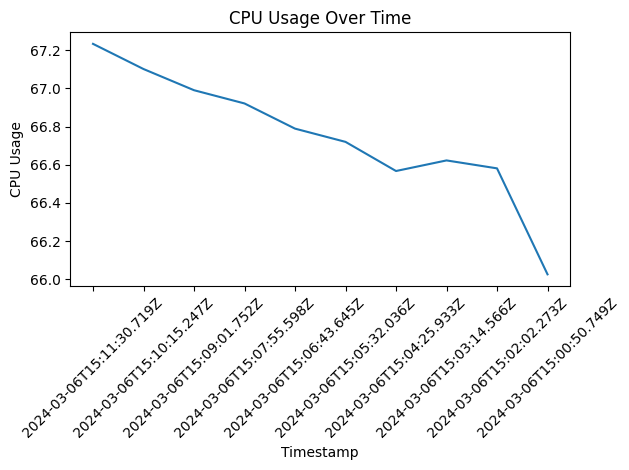

In [18]:
plt.plot(df['TIMESTAMP'], df['RAM'])
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage Over Time')
plt.xticks(rotation=45) # Optional: Rotate labels to make them more readable
plt.tight_layout() # Optional: Adjust layout to make sure everything fits without overlapping
plt.show()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 9.]),
 array([ 49.0001,  54.1001,  59.2001,  64.3001,  69.4001,  74.5001,
         79.6001,  84.7001,  89.8001,  94.9001, 100.0001]),
 <BarContainer object of 10 artists>)

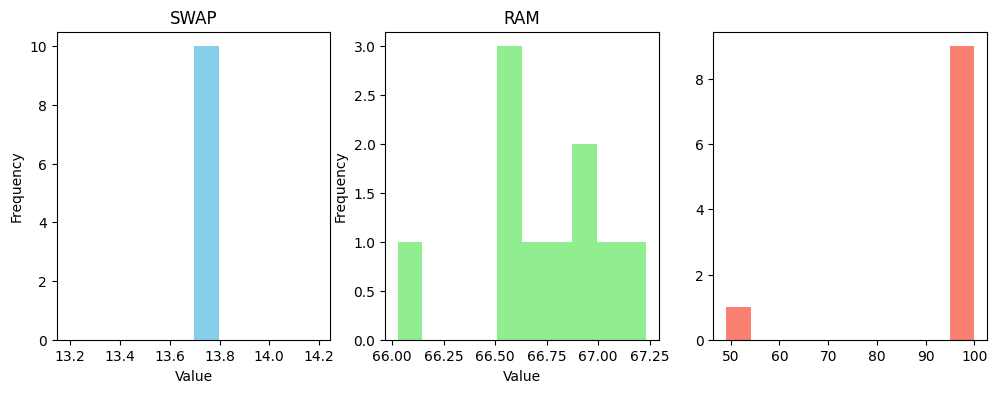

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for SWAP column
axs[0].hist(df['SWAP'], bins=10, color='skyblue')
axs[0].set_title('SWAP')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot histogram for RAM column
axs[1].hist(df['RAM'], bins=10, color='lightgreen')
axs[1].set_title('RAM')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Plot histogram for CPU column
axs[2].hist(df['CPU'], bins=10, color='salmon')